In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_68.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_46.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_28.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_20.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_22.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_65.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_41.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_67.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_12.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_37.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_1.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_55.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_2

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
train_dir = '/kaggle/input/fruit-images-for-object-detection/train_zip/train'

test_dir = '/kaggle/input/fruit-images-for-object-detection/test_zip/test'

In [7]:
train_images = []
train_labels = []
test_images = []
test_labels =[]


for filename in os.listdir(train_dir):
    if filename.split('.')[1] == 'jpg':
        img = Image.open(os.path.join(train_dir,filename)).convert('RGB')
        img = np.array(img)
        img = cv2.resize(img, (128,128))
        label = filename.split('_')[0]
        train_images.append(img)
        train_labels.append(label)

unique_labels = pd.get_dummies(train_labels).columns
print(unique_labels)
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state = 1)

for filename in os.listdir(test_dir):
    if filename.split('.')[1] == 'jpg':
        img = Image.open(os.path.join(test_dir,filename)).convert('RGB')
        img = np.array(img)
        img = cv2.resize(img, (128,128))
        label = filename.split('_')[0]
        test_images.append(img)
        test_labels.append(label)
        
test_labels = pd.get_dummies(test_labels).values
test_images = np.array(test_images)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Index(['apple', 'banana', 'mixed', 'orange'], dtype='object')


In [8]:
print("x train shape :",x_train.shape)
print("x val shape :",x_val.shape)
print("y train shape :",y_train.shape)
print("y val shape :",y_val.shape)

x train shape : (180, 128, 128, 3)
x val shape : (60, 128, 128, 3)
y train shape : (180, 4)
y val shape : (60, 4)


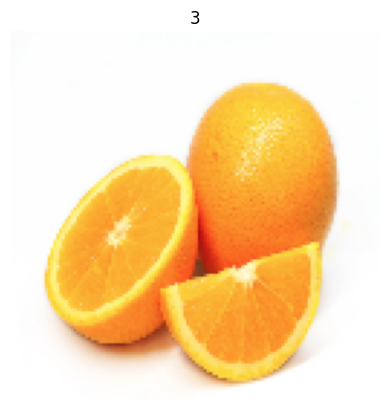

In [9]:
img=x_train[40]
plt.imshow(img)
plt.title( np.argmax(y_train[40]))
plt.axis("off")
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size =3, activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 32, kernel_size =3, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units = 256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 4, activation='sigmoid'))
model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics = ['accuracy'] )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
x_train=x_train/255.0
x_val=x_val/255.0

In [12]:
hist=model.fit(x_train,y_train,batch_size=30,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 660ms/step - accuracy: 0.2724 - loss: 1.8662 - val_accuracy: 0.4833 - val_loss: 1.3301
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 619ms/step - accuracy: 0.4729 - loss: 1.2756 - val_accuracy: 0.7000 - val_loss: 0.9119
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 614ms/step - accuracy: 0.6794 - loss: 0.9398 - val_accuracy: 0.8500 - val_loss: 0.5896
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.7842 - loss: 0.6525 - val_accuracy: 0.5833 - val_loss: 0.9073
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.6936 - loss: 0.8129 - val_accuracy: 0.8833 - val_loss: 0.4712
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - accuracy: 0.8418 - loss: 0.5101 - val_accuracy: 0.9167 - val_loss: 0.3868
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.8600 - loss: 0.3524 - val_accuracy: 0.9167 - val_loss: 0.2983
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.9084 - loss: 0.2894 - val_accuracy: 0.9333 - val_loss:

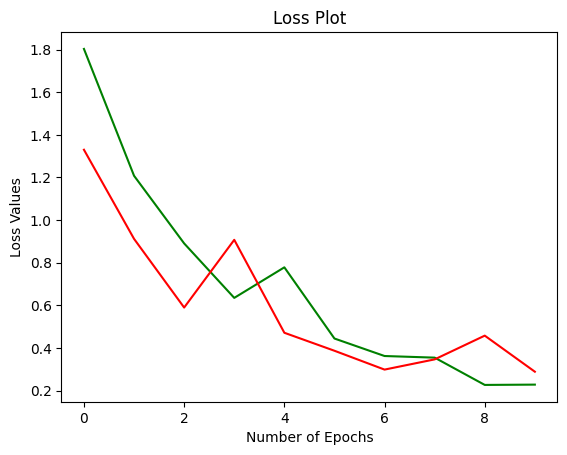

In [13]:
plt.plot(hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.history["val_loss"],color="red",label="Validation Loss")
plt.title("Loss Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Values")
plt.show()

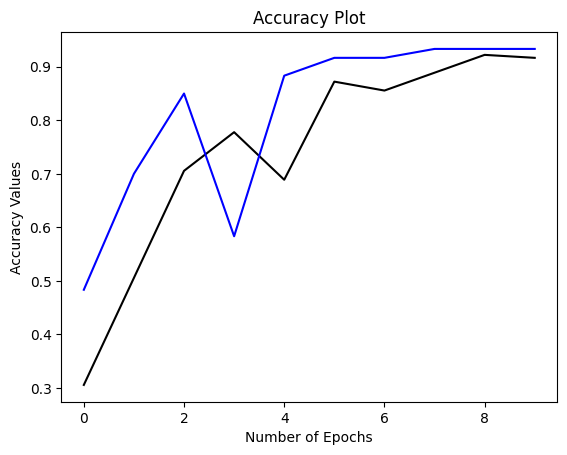

In [14]:
plt.plot(hist.history["accuracy"],color="black",label="Train Accuracy")
plt.plot(hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Values")
plt.show()

In [15]:
prediction=model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


In [16]:
predicted_classes = np.argmax(prediction, axis=1)

In [17]:
true_classes = np.argmax(test_labels, axis=1)

# Step 3: Compare predicted classes with true classes and calculate accuracy
accuracy = np.mean(predicted_classes == true_classes)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 63.33%


In [18]:
test_images=test_images/255.0
prediction=model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [19]:
predicted_classes = np.argmax(prediction, axis=1)

In [20]:
true_classes = np.argmax(test_labels, axis=1)

In [21]:
accuracy = np.mean(predicted_classes == true_classes)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.33%
